In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from drawarrow import ax_arrow, fig_arrow
from pyfonts import load_google_font
from highlight_text import ax_text, fig_text
from pypalettes import load_cmap
from PIL import Image

sheet_id = '1XO8TnffMlYXawKTFl8QirJpfIsR4oBRoULwPG6kbxF0'
gid = '0'
df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}')

# convert release_date to datetime dtype
df['release_date'] = pd.to_datetime(df['release_date']) 
# add decade column
df['decade'] = ((df['release_date'].dt.year // 10) * 10).astype(str) + "s"

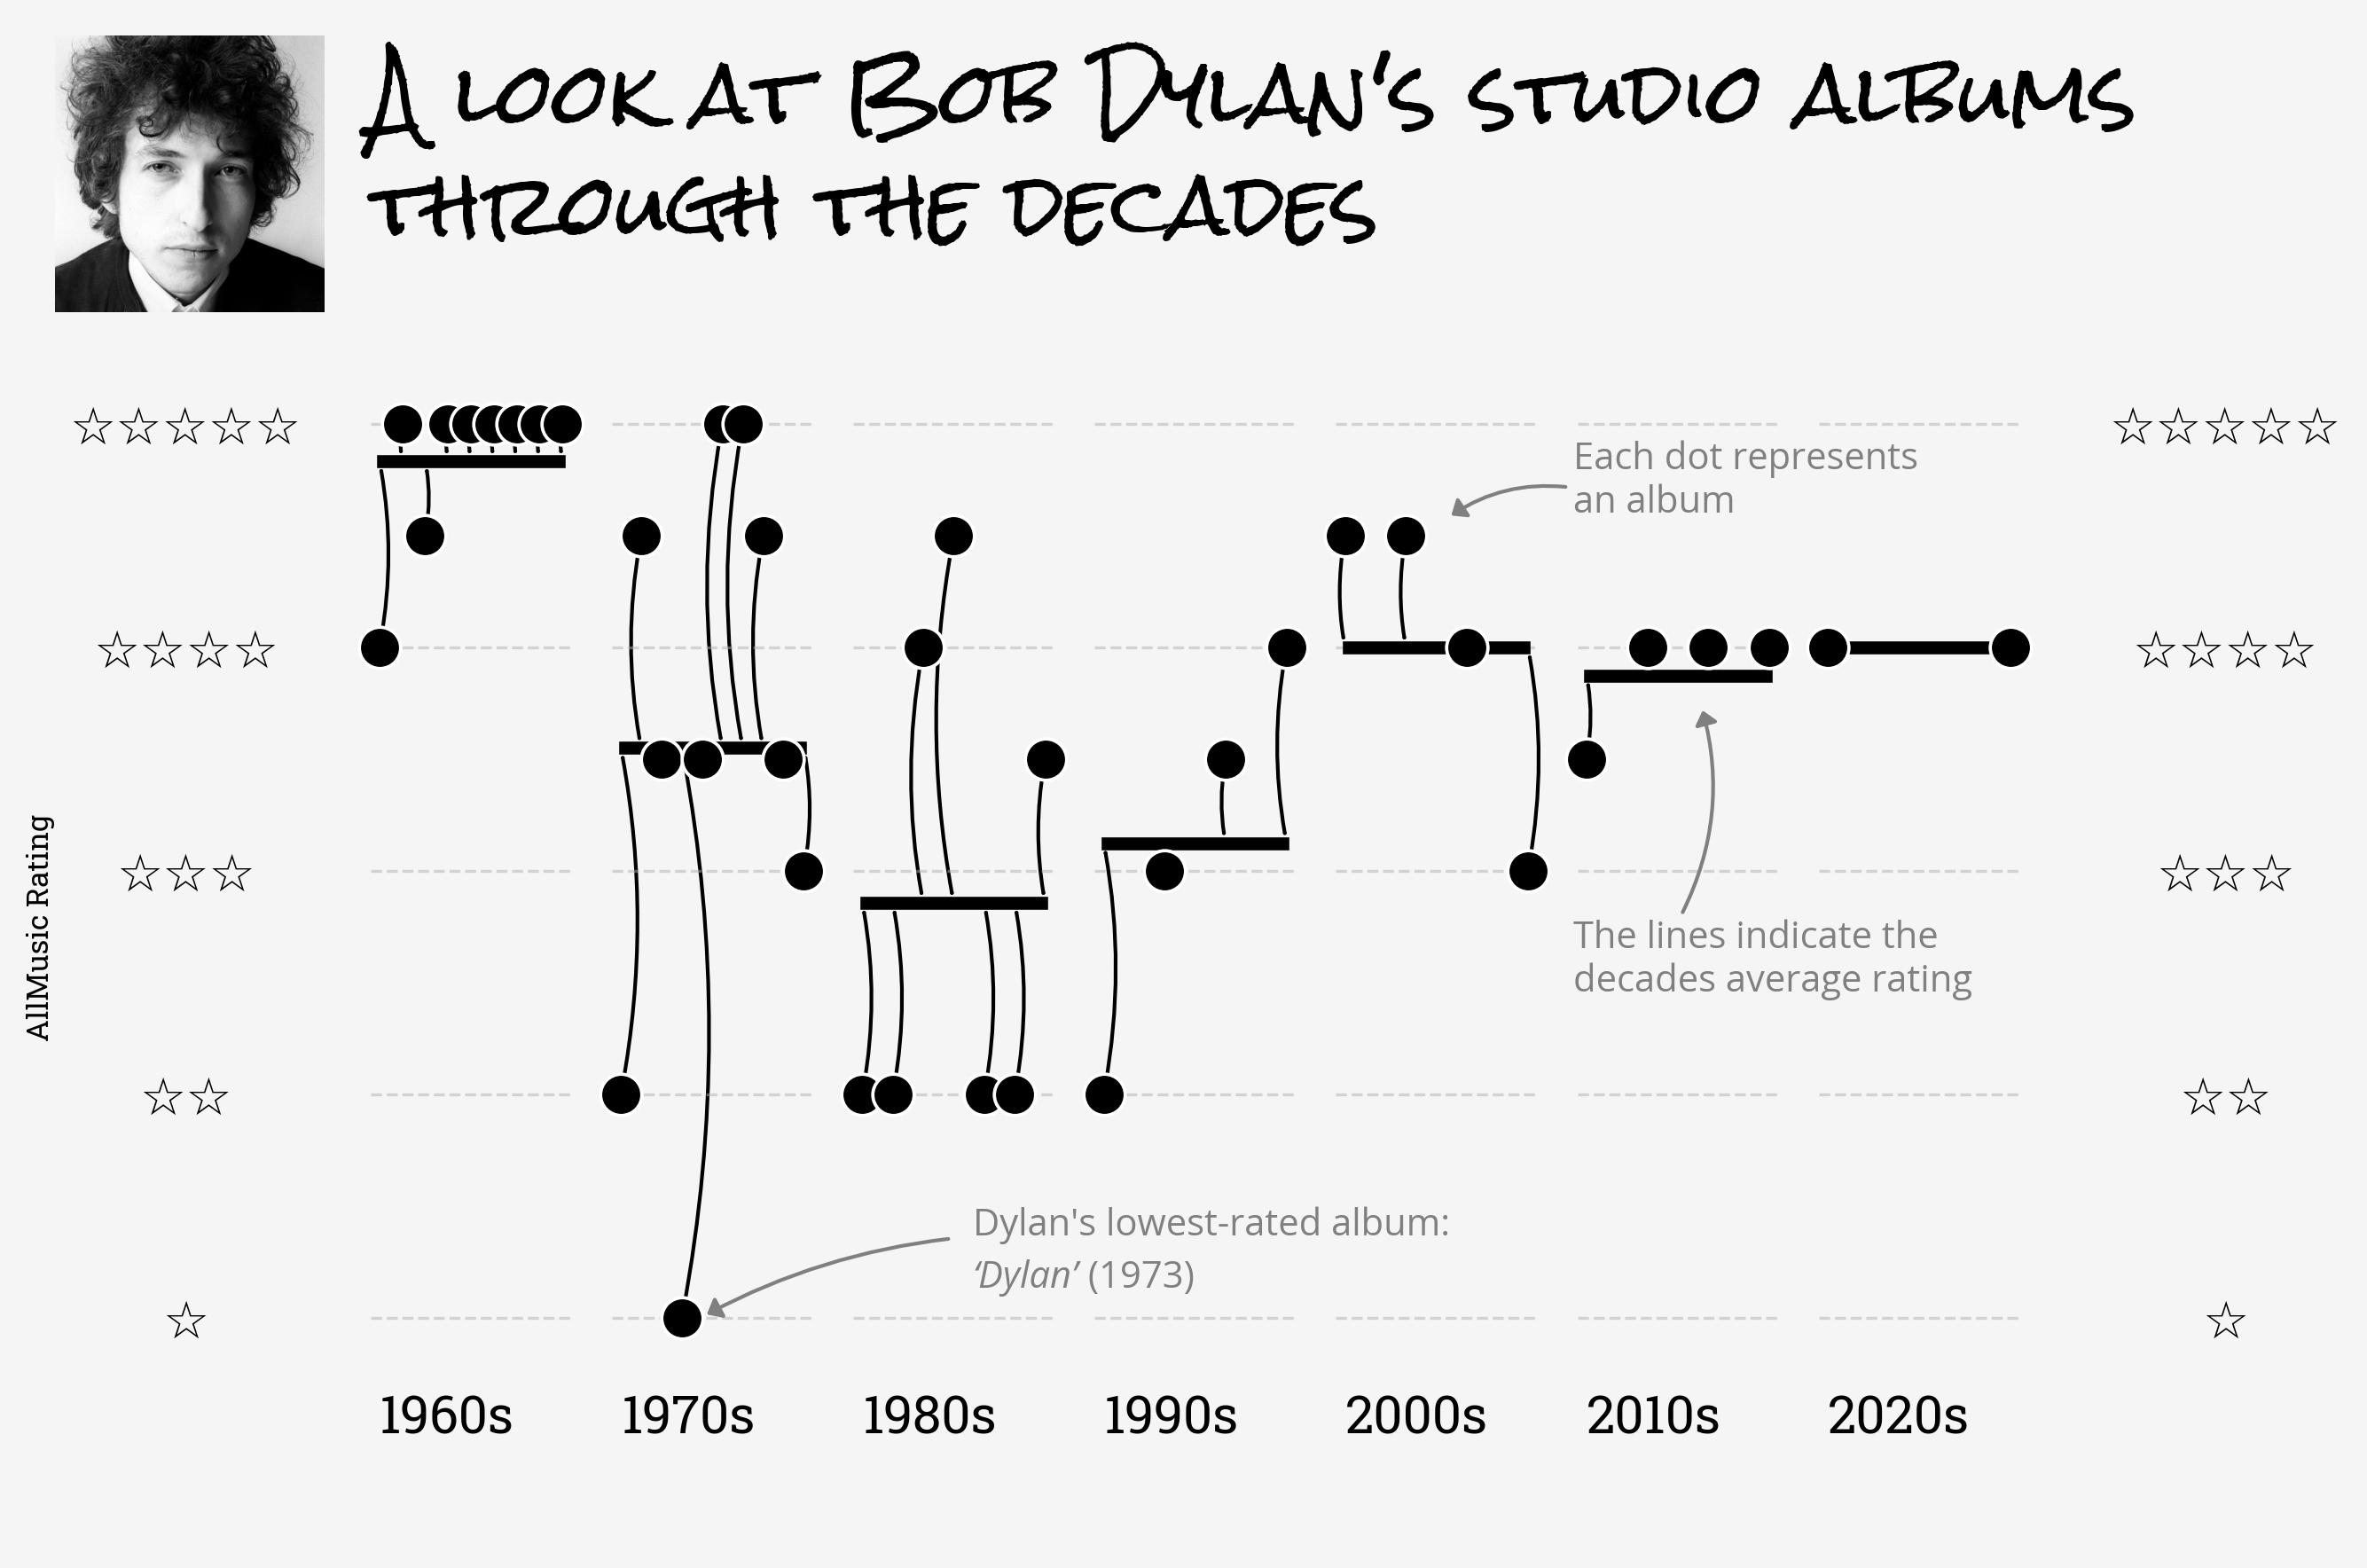

In [17]:
# load fonts
title = load_google_font("Rock Salt")
labels = load_google_font("Roboto Slab")
callouts = load_google_font("Open Sans")
callouts_italic = load_google_font("Open Sans", italic=True)

# Load colors
marker_pal = {True: '#1840A5', False: 'black'}
edgecolor_pal = {True: '#a57d18', False: 'black'}
background_color = 'whitesmoke'
secondary_color = 'grey'

# Initiate the figure and and axs
fig, axs = plt.subplots(1,7, figsize = (8,6), dpi = 300)
fig.set_facecolor(background_color)

# loop over the decades and different axs
for decade, ax in zip(df['decade'].unique(), axs.flat): 

    decade_mask = df['decade'] == decade
    df_decade = df.loc[decade_mask]

    sns.scatterplot(
        x=df.loc[df['decade'] == decade, 'num_album_decade'],
        y=df.loc[df['decade'] == decade, 'all_music_score'],
        color='black',
        s=125, ax=ax,
        clip_on=False, zorder=3
    )


    # Draw Avg lines
    ax.axhline(y= df.loc[df['decade']==decade, 'all_music_score'].mean(),
               xmin= 0+0.065, 
               xmax= 1-0.065,
               linewidth = 3.5, color = 'black')

    for score, album_num in zip(df.loc[df['decade'] == decade, 'all_music_score'],
                                df.loc[df['decade'] == decade, 'num_album_decade']):

                    # Draw arrows
                    ax_arrow(
                             head_position=(album_num, df.loc[df['decade']==decade, 'all_music_score'].mean()),
                             tail_position=(album_num, score),
                             width=1, radius=0.095, color="black",
                             head_length=0.01, head_width=0.01, clip_on=False,
                             ax=ax)

    # global x and y axis adjustments
    ax.set_ylim(0,5.5)
    ax.set_yticks([1,2,3,4,5],[])
    ax.set_xticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(length = 0)
    ax.spines[:].set_visible(False)
    
    ax.set_facecolor(background_color)
    ax.text(x= df.loc[df['decade'] == decade, 'num_album_decade'].iloc[0], # Add the decade as x tick labels
            y= 0.55,
            s=f'{decade}',
            ha = 'left', va = 'center',
            font = labels, fontsize = 14)

# Specific x and y axis adjustments 
axs[0].set_yticks([1,2,3,4,5],['☆','☆☆','☆☆☆','☆☆☆☆','☆☆☆☆☆'], fontsize = 14, ha = "center")
axs[0].set_ylabel('AllMusic Rating', fontsize = 8, fontproperties=labels)
axs[0].tick_params(length = 0, pad = 50)
axs[-1].set_yticks([1,2,3,4,5], ['☆','☆☆','☆☆☆','☆☆☆☆','☆☆☆☆☆'], fontsize = 14, ha = "center")
axs[-1].tick_params(length = 0, pad = -110)
    
# Add grid lines in every ax
for ax in axs.flat:
    ax.grid(ls = '--', zorder = 0, alpha = 0.5)

# Add dylan's portrait
parent_ax = axs.flat[0]
child1_ax = parent_ax.inset_axes([-1.6, 1, 1.4, 0.225])
img = Image.open("dylan.png")  
img = np.array(img)
child1_ax.imshow(img)
child1_ax.axis("off")

# Title
fig_text(x = 0.125, y = 1.05,
        s = "A look at Bob Dylan's studio albums\nthrough the decades",
         font = title,
        fontsize = 22)

# Callouts
fig.text(x = 0.69,
        y = 0.755,
        s = """Each dot represents\nan album""",
        font = callouts, color = secondary_color, fontsize = 10)
fig_arrow(tail_position= (0.69, 0.77),
          head_position= (0.63, 0.75),
         fill_head=True, head_length=3., head_width = 2.5,
          color = secondary_color,radius = 0.2)

fig.text(x = 0.69,
        y = 0.455,
        s = """The lines indicate the
decades average rating""",
        font = callouts, color = secondary_color, fontsize = 10)
fig_arrow(tail_position= (0.74, 0.5),
          head_position= (0.75, 0.635),
         fill_head=True, head_length=3., head_width = 2.5,
          color = secondary_color,radius = 0.2)

fig_text(x=0.52, y=0.32, s = "Dylan's lowest-rated album:\n<‘Dylan’> (1973)", ha = 'center', font = callouts,
         color = secondary_color, fontsize = 10,
        highlight_textprops= [{'font': callouts_italic}])
fig_arrow(tail_position= (0.4, 0.3),
          head_position= (0.28, 0.25),
         fill_head=True, head_length=3., head_width = 2.5,
          color = secondary_color,radius = 0.1)

# plt.savefig('dylan_viz.png', bbox_inches = 'tight', dpi = 300)
plt.show()